# City of Calgary Traffic Incidents Exploratory Data Analysis

## 1. Introduction

### 1.1 Project Overview

The City of Calgary is consistently rated as one of the best places to live in the world according to the [EIU](https://moving2canada.com/news-and-features/features/planning/destination-guides/calgary/2022-eiu-liveability-index-three-canadian-cities-top-ten/). With its proximity to the Rocky Mountains and it's large business sector, Calgary provides to all demographics an excellent place to call home. With all the locations to visit within and around the city, Calgary has an avid commuter culture. I happen to be one such commuter.

During my commuting time, I stick to roads in the southwest quadrant of the city and have never been in a traffic incident. However, many traffic incidents are reported via radio at high volume times. Combining this with my recent exploration of northwest and northeast quadrants of the city, I began to ask myself whether I am at a higher risk of being in an accident. Naively, I would assume that smaller roads and more cars would mean more incidents. In particular, downtown streets or busy highways with small merges seem like the most likely place to have an incident.

In order to answer the question of "In what area's and at what time are commuters most likely to be involved in a traffic incident in Calgary." We can use data from the traffic incident dataset provided by the City of Calgary's [open data](https://data.calgary.ca/Transportation-Transit/Traffic-Incidents/35ra-9556) website. The data from this website can be used to get insight into the traffic incident patterns of the burgeoning metropolitan city by utilizing exploratory data analysis and further data exploration techniques such as predictive modeling and machine learning algorithms.

### 1.2 Literature Review and Background

Traffic incidents are a heavily researched area. The [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries) has an overview of traffic incidents within the global picture. Some key points are below:

- Approximately 1.3 million individuals die each year as a result of a traffic incident.
- 93% of the world's fatalities on the roads occur in low- and middle-income countries, even though these countries have approximately 60% of the world's vehicles.

The upcoming analysis will use the global statistics as a soft guide. The data from Calgary is expected to show us a higher number of traffic incidents in lower-income areas, such as Forest Lawn.

Research has also taken place on a more focused level within the City of Calgary. The dataset this project focuses on has been at the center of analysis before. Data analysis of the 2020 traffic incidents compared to 2019 was completed [here](https://pub-calgary.escribemeetings.com/filestream.ashx?DocumentId=189649). It shows a sharp decline in overall incidents. Which is expected during the height of the lockdown in Alberta, Canada. While the linked paper focuses more on the stats from 2019 compared to 2020, this project is to paint a larger overall picture using the complete dataset. With the increase in population and return to regular road use, analyzing data from "normal" times is crucial to understanding incident-heavy areas today.

Another more informal analysis was conducted by Siavash Fard, M.Sc., P.Eng., PMP, which can be found on [LinkedIn](https://www.linkedin.com/pulse/prediction-traffic-incidents-calgary-siavash-fard-/). This analysis attempts to predict future incidents using the traffic incident dataset used in this study, in addition to data regarding traffic control devices. The report focuses on predicting traffic incidents, instead of visualizing and finding insights within the dataset.

The former studies show a solid area for this project to focus on. We can use the former research projects to aid in defining the questions to answer throughout the analysis.


### 1.3 Aims and Objectives

The goal of this exploratory data analysis is to get a high-level overview of traffic incidents in the City of Calgary. To pursue this goal, the following questions will be asked and answered:

1. Which areas of the city have the most incidents?
    - Hypothesis: Downtown roads and highways are the most dangerous roads.
2. What time of day has the highest number of incidents?
    - Hypothesis: Rush hours (8-9) and (5-6) are the most dangerous hours of weekdays.
3. Does the day, week, month, or year cause variance in the frequency of incidents?
    - Hypothesis: Winter months and weekdays are the most dangerous times to be on the road.
4. What kind of incidents are happening?
    - Does the type of incident affect the time between the start and end of said incident?
    - Does the type of incident change based on location in the city?

Answering these questions will allow us to pinpoint unsafe areas during a commute within the city. The data source noted that the dataset is updated every 10 minutes with new traffic incidents. Therefore, as the dataset grows, more data will be brought in to more thoroughly examine the nature of traffic incidents in Calgary.


### 1.4 Library Imports

In [1]:
# Import Necessary Libraries

# Basic imports to allow for data wrangling and analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Socrate library to get most up to date csv from open Calgary from API
from sodapy import Socrata

# Import random module to help in handling NaN values
import random

# Import folium to allow for interactive map use and drawing of heat map.
import folium
from folium.plugins import HeatMap

# Import nltk to aid in natural language processing for text based data.
import nltk

# Import wordcloud to visualise words used in text based data.
from wordcloud import WordCloud

### 1.5 Introduction Summary

The City of Calgary is a diverse city with many commuters. Using data from the city, can insights be gained that will enable safer commutes and better city planning? The former research questions establish a starting path which will bring these insights to the forefront when analysing the traffic incident data.

## 2. Data Acquisition and Justification 

### 2.1 Data Source and Review

The data that is the subject of this analysis is a dataset containing archived information on traffic incidents in Calgary. The data is updated every 10 minutes, and archiving started in 2016. The traffic incidents range from stalled vehicles to multi-vehicle collisions. Analyzing this dataset will answer the research questions, and it provides a large enough dataset to gain meaningful insights into the traffic incidents in Calgary.

An advanced traveller system collects and reports traffic incidents to [this](https://www.calgary.ca/roads/conditions/traffic.html) web page. These reports are archived every ten minutes in the open data dataset that is the focal point of this analysis. The ATIS has many inputs, mainly from traffic control and information devices, such as traffic cameras, CCTV cameras, and road sensors. The ATIS system also incorporates commuter inputs via the WAZE application. More information about Calgary's ATIS can be found [here](https://www.calgary.ca/roads/conditions/advanced-traveller-information-system.html).

This dataset provides the most accurate picture of Calgary traffic incidents available for public use. It does, however, have its flaws. Some of these are listed below.

- The website indicates, "Please note there may be gaps in the data due to system or script malfunction." This quote is a good indicator that there will be missing values in the dataset.
- The ATIS system is limited by its hardware locations. The city cannot place cameras everywhere and only spot them at busy intersections, as indicated by [this](https://www.calgary.ca/roads/conditions/traffic-cameras.html) map. Real-time updates for incidents away from busy intersections could be subject to human errors such as late/missing reporting or false positives.
- The data reporting is a subject of criticism as well. This data is to be consumed by a commuter planning their route. Not to be recorded for data analysis. We may see issues arise because of this further along the project.



### 2.2 Data Comparison

The open Calgary dataset is well-suited to aid in answering our research questions through data analysis. However, other datasets containing information on traffic in Calgary are available for use. How does this dataset compare?

The [Calgary Traffic Counts System](https://trafficcounts.calgary.ca/) is another open data source provided by the City of Calgary. It provides data related to traffic around intersections. This data has been in collection for over 40 years, which would paint a much better historical picture of the traffic standing in Calgary. The data does not explicitly show traffic incidents but rather the use of the roads within Calgary. Compared to our traffic incident dataset, this source is better suited to understanding the growth and use of Calgary roads in general as opposed to the areas and times which are the most dangerous.

Considering the sources for accurate data are slim, we are limited to data provided by the Alberta government or the City of Calgary. An example of data from the Alberta government can be found [here](https://open.alberta.ca/opendata/traffic-collision-casualties-alberta). This dataset is a high-level overview of the number of incidents, deaths and injuries by year related to traffic incidents. This dataset reports on years from from 2001-2014 and is a very high overview of the total incidents pear year in Calgary. However, each incident does not have associated information, there's no precise date, and due to the simplicity, little insights could be gained that are not already clear from looking at the small dataset. This dataset is better suited as a supplementary dataset to a larger one.

### 2.3 Scope of work

This project will follow a systemic approach to ensure accurate inights, patterns, and trends arise from analysing the traffic incidents dataset. The scope of work is listed below:

- Import the dataset and conduct initial data exploration and cleaning.
    - i.e. check for missing values, boundary cases or possible inaccuracies and validate data types.
- Modify the data by adjusting any problem areas.
- Conduct exploratory data analysis to bring the patterns, insights and trends to the surface that answer our research questions.
- Evaluate and summarize the findings brought to light by the EDA.
- Reflect on the process and outcomes of the EDA, from start to finish. Reflecting includes Observing any potential missteps or areas that need improvement.

This scope of work will ensure the research questions are answered. It will also allow for the data to be further processed and involved in future predictive modelling or machine learning algorithm to help gain further insights into traffic incidents in the City of Calgary.


### 2.4 Loading the Data

#### Marker Note

The below code was refactored directly from [this](https://stackoverflow.com/questions/46572365/import-data-to-dataframe-using-soda-api) stack overflow post.

The API call and storage will execute. However, it is currently commented out to remove long load times. The data is loaded from a csv file which was downloaded via the below code and saved to csv on May 30th 2023.

In [2]:
# Load updated data from https://data.calgary.ca/Transportation-Transit/Traffic-Incidents/35ra-9556

# Create Socrata object which links to the open Calgary website API. None is passed as a value as no login information is needed to retrieve the information.
## client = Socrata("data.calgary.ca", None)

# Store the results of the api call from the data source
## results = client.get_all("35ra-9556")

# Convert to pandas DataFrame
## df = pd.DataFrame.from_records(results)

In [3]:
# Load data in from csv.

df = pd.read_csv("traffic-incidents-05-30-2023.csv")

### 2.5 Data Acquisition and Justification Summary

Through a substantial review, the dataset chosen from open Calgary is confirmed to be fit for purpose; Combining this with a solid scope of work, the analysis will produce insights that answer the proposed research questions.

## 3. Ethical Considerations

### 3.1 License and Terms of Use

The dataset of focus in this project is subject to an open government license. Indicating there are little limitations regarding the use of the data. The [license](https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa) agreement has few conditions and indicates the data is to be used for any legal purpose, including commercial. A portion of the license agreement is below.

The terms indicate;

The Information Provider grants you a worldwide, royalty-free, perpetual, non-exclusive license to use the Information, including for commercial purposes, subject to the terms below. You are free to: Copy, modify, publish, translate, adapt, distribute or otherwise use the Information in any medium, mode or format for any lawful purpose.

Therefore, based upon the terms of use, we have express permission to complete an exploratory data analysis research project based on this dataset.

### 3.2 Ethical Ramifications of Data Use

The above terms of use confirm the data is free, open and encouraged to be used in multiple areas. However, are there any negative insights or repercussions that could come to light from using the data?

Ensuring data analysis produces reliable and accurate results is not always easy. Some things to remember when analyzing data include privacy concerns, misleading insights and potential biases. How does this dataset shapeup when keeping these items in mind?

- Privacy
    - The dataset does not have any identifying information within. It only contains information regarding the incident's nature, location and time. Items like license plates, individuals involved or any other identifying information is not present in the dataset. Therefore, during the analysis, privacy concerns should be at a minimum. However, the individuals involved in the incidents reported in this dataset most likely do not know that their incident was recorded in this manner. While this is still a minuscule issue, it shows how much data is collected on an individual's actions throughout the day. Even down to their driving habits.
- Misleading Insights
    - This is a area of concern with this dataset. The data originates from an rss feed reporting from [this](https://www.calgary.ca/roads/conditions/traffic.html) website. This website indicates, "Details on road construction, road closures, detours, accidents and incidents that may affect your commute are shown on the map." All these details are collected using Calgary's ATIS system. Which is a network of traffic cameras and other data collection systems. This information brings a couple of issues to light.
        - The cameras only appear to be on heavily used roadways. An understandable decision in terms of efficiency, but an issue in terms of data collection. Areas of the city with lower traffic volumes can have traffic incidents which are not properly reported if the ATIS does not have sufficient monitoring abilities in that area.
        - During poor visibility weather, the system may have issues identifying incidents.
        - The data has a large amount of missing data in the modified_dt column. This column is supposed to contain the date and time regarding when the incident is resolved. The missing data is most likely due to poor reporting standards. However, it highlights a issue with this dataset in the reliability of the modified_dt column. How accurate is the system in reporting when an incident is resolved? Therefore, insights gained from this column should be taken with a grain of salt.
        - The data has a period where a system malfunction occurred. From July 2019 - August 2019.
- Biases
    - The dataset's bias comes more from ATIS limitations than potential socioeconomic bias points. The limitations of the ATIS system may lead to better reporting in higher observed roads and areas. Bias should be kept in mind when working with this data. However, it's not a forefront issue.

Overall the data should be used to gain a high level understanding of the incident behaviour in Calgary. However, insights should be cross-referenced with datasets from other cities and compared with former literature to ensure that the data presented and the current understanding of traffic incidents is comparable.


### 3.3 Ethical Considerations Summary

Open Calgary is a great website to find free and open license data. This dataset is no exception. While we should always have ethical considerations on our minds, this dataset is relatively safe to use from a licensing perspective and an ethical consideration standpoint. Further ethical decisions may arise while exploring the data. These issues will be dealt with when they arise.

## 4. Data Exploration and Cleaning

The dataset is to be explored simply in this section to ensure the data is ready for analysis. The exploration in this segment includes the following tasks:

-Gaining a general understanding of the shapes, rows and column values of the dataset.
-Removing unneeded/duplicated data.
 -Adjusting/replacing NA values
-Adjusting the datatype of the dataset columns.
-Creating new columns with more related data

### 4.1 Data Exploration

In [4]:
df.shape

(39814, 13)

The shape property shows us that there have been approximately 40,000 traffic incidents since this dataset started collection. The dataset also has 13 columns per incident to analyze and compare. Further understanding about the data columns and their irrespective information can be gathered by using the columns, head(), tail(), sample(), info(), and describe() properties/methods on the data frame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39814 entries, 0 to 39813
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   incident_info                39814 non-null  object 
 1   description                  39812 non-null  object 
 2   start_dt                     39814 non-null  object 
 3   modified_dt                  25757 non-null  object 
 4   quadrant                     25755 non-null  object 
 5   longitude                    39814 non-null  float64
 6   latitude                     39814 non-null  float64
 7   count                        39814 non-null  int64  
 8   id                           39814 non-null  object 
 9   point                        39814 non-null  object 
 10  :@computed_region_kxmf_bzkv  39721 non-null  float64
 11  :@computed_region_4a3i_ccfj  39721 non-null  float64
 12  :@computed_region_4b54_tmc4  39718 non-null  float64
dtypes: float64(5), i

The info method indicates we have a fairly healthy dataset. However, the datatype of 6 columns needs to be adjusted to ensure proper analysis. The column's description, modified_dt and quadrant all contain null values. The description column only has two which indicate an easy fix can take place, while the latter two will need a more complex fix as close to 40% of their values are null. Leaving these as is would skew any data analysis we produce. Replacing the null values will occur in the data cleaning portion of this segment.

In [6]:
# get the first 5 rows of dataset
df.head()

,incident_info,description,start_dt,modified_dt,quadrant,longitude,latitude,count,id,point,:@computed_region_kxmf_bzkv,:@computed_region_4a3i_ccfj,:@computed_region_4b54_tmc4
0,68 Street north of 32 Avenue NE,Traffic incident.,2023-05-30T18:40:52.000,2023-05-30T19:11:29.000,NE,-113.935126,51.082180,1,2023-05-30T18:40:5251.082180180176614-113.9351...,"{'type': 'Point', 'coordinates': [-113.9351261...",161.0,4.0,9.0
1,Woodpark Boulevard and Woodpark Avenue SW,Traffic incident.,2023-05-30T18:37:07.000,2023-05-30T19:11:29.000,SW,-114.109466,50.947267,1,2023-05-30T18:37:0750.94726710588861-114.10946...,"{'type': 'Point', 'coordinates': [-114.1094664...",216.0,1.0,5.0
2,Evanston Drive and Evanston Hl NW,Traffic incident.,2023-05-30T18:10:10.000,2023-05-30T18:42:16.000,NW,-114.111164,51.179749,1,2023-05-30T18:10:1051.17974859950634-114.11116...,"{'type': 'Point', 'coordinates': [-114.1111640...",237.0,2.0,3.0
3,Macleod Trail and 69 Avenue SW,Traffic incident. Blocking multiple lanes,2023-05-30T18:00:26.000,2023-05-30T18:01:55.000,NW,-114.071656,50.991433,1,2023-05-30T18:00:2650.991433177037095-114.0716...,"{'type': 'Point', 'coordinates': [-114.0716556...",120.0,1.0,8.0
4,Northbound Shaganappi Trail north of Stoney T...,Traffic incident. Blocking the left lane,2023-05-30T17:39:58.000,2023-05-30T17:42:19.000,NW,-114.140886,51.154299,1,2023-05-30T17:39:5851.154298543179905-114.1408...,"{'type': 'Point', 'coordinates': [-114.1408859...",220.0,2.0,3.0


Using the method head() on the dataframe provides a quick understanding of each column in the dataframe.
- ***incident_info*** contains the street(s) the incident took place on.
- ***description*** is a brief sentence regarding the type of incident.
    - "Traffic incident" is not descriptive and takes up 4 of the 5 data points. How many incidents are labelled with this information?
- ***start_dt and modified_dt*** contain the respective reported start and end time of the incident.
    - Potential to use these columns to get the total time of incident clean-up and get an inference on the severity based on the new total_time column.
- ***quadrant*** is what part of the city the incident happened in.
- ***longitude and latitude*** store the longitude and latitude.
- ***count*** has an unknown meaning. The open Calgary website does not have any information on this column.
    - All columns appear to have the value 1. This will need to be confirmed and removed.
- ***id*** is the identifier of the incident. It contains a concatenation of the start_dt, latitude and longitude columns
    - This column appears to be what is currently sorting the data frame.
    - This column is another candidate to be removed from the data frame as sorting by start_dt is equivalent.
- ***point*** stores a JSON object which contains information for a point containing the longitude and latitude
    - Appears to be an object used within sodapy. Could be useful for map visualization.
    - If the point column makes it easy to visualize data on a map, the longitude and latitude columns could be removed. Or vice versa depending on the mapping library chosen.
- The last three columns appear to be a byproduct of the SODA API. The open Calgary website does not list these and [this](https://hub.safe.com/publishers/cdesisto/templates/socrata_computed_columns) website confirms this.
    - When cleaning data these three columns are to be dropped as they provide no usable data.

In [7]:
# Display the last 5 elements to get an idea of the end of the dataframe.
df.tail()

,incident_info,description,start_dt,modified_dt,quadrant,longitude,latitude,count,id,point,:@computed_region_kxmf_bzkv,:@computed_region_4a3i_ccfj,:@computed_region_4b54_tmc4
39809,Southbound University Drive at Crowchild Trail NW,2 vehicle incident.,2016-12-06T17:05:00.000,2016-12-06T17:10:00.000,NW,-114.119584,51.066391,1,2016-12-06T17:05:0051.06639113-114.1195835,"{'type': 'Point', 'coordinates': [-114.1195835...",154.0,2.0,7.0
39810,Ogden Road at Bonnybrook Road SE,2 vehicle incident.,2016-12-06T16:26:00.000,2016-12-06T16:38:00.000,SE,-114.030872,51.028393,1,2016-12-06T16:26:0051.02839263-114.0308717,"{'type': 'Point', 'coordinates': [-114.0308717...",98.0,3.0,10.0
39811,Macleod Trail at 9 Avenue SE,2 vehicle incident.,2016-12-06T16:25:00.000,2016-12-06T16:26:00.000,SE,-114.058178,51.044471,1,2016-12-06T16:25:0051.04447099-114.0581785,"{'type': 'Point', 'coordinates': [-114.0581785...",262.0,3.0,7.0
39812,Eastbound Memorial Drive approaching Deerfoot ...,2 vehicle incident blocking the middle lane.,2016-12-06T14:36:00.000,2016-12-06T14:42:00.000,NE,-114.020548,51.047634,1,2016-12-06T14:36:0051.0476343-114.0205479,"{'type': 'Point', 'coordinates': [-114.0205479...",137.0,4.0,10.0
39813,Eastbound McKnight Boulevard at 2 Street NW,Multi vehicle incident.,2016-12-06T10:00:00.000,2016-12-06T10:01:00.000,NW,-114.064987,51.096111,1,2016-12-06T10:00:0051.09611149-114.0649874,"{'type': 'Point', 'coordinates': [-114.0649874...",192.0,2.0,2.0


There is nothing out of the ordinary or not previously understood from df.head().

In [8]:
# Get a random selection of 5 data points to get a better picture of the data as a whole.
df.sample(5)

,incident_info,description,start_dt,modified_dt,quadrant,longitude,latitude,count,id,point,:@computed_region_kxmf_bzkv,:@computed_region_4a3i_ccfj,:@computed_region_4b54_tmc4
9598,Southbound Deerfoot Trail after Glenmore Trail SE,Multi-vehicle incident. Blocking the right lane,2022-02-09T17:19:00.000,2022-02-09T17:20:00.000,SE,-114.037110,50.983406,1,2022-02-09T17:19:3750.983405523969104-114.0371...,"{'type': 'Point', 'coordinates': [-114.0371102...",1.0,3.0,10.0
34162,Southbound 37 Street and Spruce Meadows Trail SW,Multi-vehicle incident.,2018-01-03T18:20:00.000,2018-01-03T18:22:00.000,SW,-114.140302,50.892162,1,2018-01-03T18:20:0250.8921620811782-114.140301...,"{'type': 'Point', 'coordinates': [-114.1403016...",212.0,1.0,5.0
3279,Eastbound 32 Avenue at 9 Street NE,Traffic incident. Blocking multiple lanes,2022-12-09T14:14:36.000,2022-12-09T14:39:14.000,NE,-114.041532,51.081432,1,2022-12-09T14:14:3651.08143171401649-114.04153...,"{'type': 'Point', 'coordinates': [-114.0415319...",239.0,4.0,10.0
6652,35 Street and 14 Avenue SE,Traffic incident.,2022-07-16T15:43:53.000,2022-07-16T15:44:57.000,SE,-113.983114,51.040928,1,2022-07-16T15:43:5351.040927731528704-113.9831...,"{'type': 'Point', 'coordinates': [-113.9831136...",121.0,3.0,12.0
20263,10 Street and 4 Avenue NW,Traffic incident. Blocking the right lane NB,2020-06-25T12:13:00.000,NaN,NaN,-114.085940,51.056808,1,2020-06-25T12:13:3251.056808006457075-114.0859...,"{'type': 'Point', 'coordinates': [-114.0859399...",62.0,2.0,7.0


More observations can be made with the sample method.
- The description field is confirmed to contain simple descriptions about the incident.
    - Simple NLP processing and word mapping is a good starting point for processing this column.
- NaN appears in both modified_dt and quadrant. 
    - We can infer the value of NaN in modified_dt by taking the average total time of incidents of the same calibre.
    - The quadrant NaN can be inferred from the incident_info column.

### 4.2 Data Cleaning

Using the information from above. The dataframe can be cleaned to reduce its complexity, remove invalid values and simplify analysis.
This process is started by removing the count, id and last three columns.

#### 4.21 Remove bloat columns

In [9]:
# Get list of current columns to confirm starting configuration.
df.columns

Index(['incident_info', 'description', 'start_dt', 'modified_dt', 'quadrant',
       'longitude', 'latitude', 'count', 'id', 'point',
       ':@computed_region_kxmf_bzkv', ':@computed_region_4a3i_ccfj',
       ':@computed_region_4b54_tmc4'],
      dtype='object')

In [10]:
# Confirm values in "count" column
df["count"].unique()

array([1])

The unique method returned one value. Thereby confirming the count column serves no purpose for this analysis. It will be removed alongside the id, point and the last three columns. The id column does not serve a purpose as it's a concatenation of three other columns. The point column is a geoJSON type which cannot be processed with my current Python abilities. Therefore, it will be removed as I focus on the longitude and latitude. The latter three were confirmed to be byproducts from the SODA API and are not needed in the analysis.

In [11]:
# Remove "count" and last three columns from dataframe.
df.drop(
    columns=[':@computed_region_kxmf_bzkv',
             ':@computed_region_4a3i_ccfj',
             ':@computed_region_4b54_tmc4',
             'count',
             'id',
             'point'], inplace=True)

# Confirm columns left in dataframe
df.columns

Index(['incident_info', 'description', 'start_dt', 'modified_dt', 'quadrant',
       'longitude', 'latitude'],
      dtype='object')

The remaining columns are correct and unneeded columns have been removed. The names of each column will now be adjusted to be more description and uniform.

In [12]:
# Rename columns to more fitting names and spelling
df = df.rename(columns={'incident_info': 'Incident_Info',
                        'description': 'Description',
                        'start_dt': 'Start_Time',
                        'modified_dt': 'End_Time',
                        'quadrant': 'Quadrant',
                        'longitude': 'Longitude',
                        'latitude': 'Latitude', })

#### 4.22 Change datatypes of columns

The data type of each column needs to be adjusted to ensure proper analysis can take place. Below we can see that almost all columns are of object type except for the longitued and latitutde columns. The columns incident_info, description and quadrant are all better represented as strings, and any column to do with time is better represented as a DateTime object.

In [13]:
df.dtypes

Incident_Info     object
Description       object
Start_Time        object
End_Time          object
Quadrant          object
Longitude        float64
Latitude         float64
dtype: object

In [14]:
# Adjust all columns to have the proper data type.

# Change columns that are better represented as strings to string datatype.
df[['Incident_Info',
    'Description',
    'Quadrant']] = df[['Incident_Info',
                       'Description',
                       'Quadrant']].astype('string')

# trim any whitespace from string objects to allow for easier string manipulation.
df = df.apply(lambda x: x.str.strip() if x.dtype == 'string' else x)

# Change columns that are better represented as datetime objects to datetime64 datatype.
df[['Start_Time', 'End_Time']] = df[['Start_Time', 'End_Time']].apply(pd.to_datetime)

# Confirm datatype were properly changed.
df.dtypes

Incident_Info            string
Description              string
Start_Time       datetime64[ns]
End_Time         datetime64[ns]
Quadrant                 string
Longitude               float64
Latitude                float64
dtype: object

#### 4.23 Remove Duplicated Rows

Before removing any null values, let's remove any potential duplicated values. We can see below that there are only five duplicates. Therefore, these values be removed without skewing the data. We also need to be sure to reset the index when dropping any rows to ensure the data stays uniform.

In [15]:
# Confirm duplicates exist in dataframe.
df.loc[df.duplicated()]

,Incident_Info,Description,Start_Time,End_Time,Quadrant,Longitude,Latitude
25000,Eastbound Memorial Drive and Deerfoot Trail NE,Multi-vehicle incident. Blocking the right lan...,2019-09-26 12:10:00,NaT,<NA>,-114.021886,51.047439
39724,Westbound Stoney approaching Shaganappi Trail NW.,Multi vehicle incident.,2016-12-09 17:16:00,2016-12-09 17:16:00,NW,-114.147933,51.152736
39726,Sunridge Way at 36 Street NE,There is an incident involving LRT.,2016-12-09 17:14:00,2016-12-09 17:16:00,NE,-113.984934,51.067299
39730,20 Avenue at 8 Street NW,2 vehicle incident.,2016-12-09 16:58:00,2016-12-09 17:16:00,NW,-114.081378,51.070539
39732,Westbound McKnight Boulevard approaching John ...,2 vehicle incident.,2016-12-09 16:46:00,2016-12-09 17:16:00,NW,-114.083318,51.097316


In [16]:
# Remove duplicates and reset index to ensure dataframe is healthy.
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

# Confirm duplicates were dropped.
df.loc[df.duplicated()]

,Incident_Info,Description,Start_Time,End_Time,Quadrant,Longitude,Latitude


#### 4.24 Remove Null Values

Any null values need to be adjusted to ensure the analysis is accurate. We can see below that the dataset is fairly healthy. However, there are problem areas in three columns. Description, End_time and quadrant. For the description column, we can replace null values with 'Traffic incident' as that is the most common value in the column. The latter two will need more complex processing to ensure our analysis is accurate.

In [17]:
# Find the sum of null values in the dataframe.
df.isnull().sum()

Incident_Info        0
Description          2
Start_Time           0
End_Time         14056
Quadrant         14058
Longitude            0
Latitude             0
dtype: int64

In [18]:
# Fill any null values in description with "Traffic incident."
df['Description'].fillna('Traffic incident.', inplace=True)

# Confirm percent of valid quadrant values before adjusting.
df['Quadrant'].value_counts(normalize=True, dropna=False)

<NA>    0.353136
SE      0.205808
NE      0.165189
NW      0.142933
SW      0.132935
Name: Quadrant, dtype: Float64

The current values in the quadrant column are only valid in ~65% of the datapoints. This is too low to ignore and will need to be adjusted. Knowing that the incident info column has the quadrant at the end of the string, we can use this to adjust the NaN values.

In [19]:
# Replace NaN values in quadrant.

# Replace NaN quadrant values with last two characters of incident_info. As this will populate more of the quadrant data.
df['Quadrant'].fillna(df['Incident_Info'].str[-2:], inplace=True)

# Confirm quadrant data is now more accurate.
df['Quadrant'].value_counts(normalize=True, dropna=False)

SE    0.323218
NE     0.26381
SW    0.203472
NW    0.201236
 N     0.00309
 S    0.002462
 E    0.001005
ge    0.000628
 W    0.000151
ad    0.000126
ry    0.000126
vd    0.000075
rd    0.000075
ea    0.000075
st     0.00005
il     0.00005
t;     0.00005
th     0.00005
nW    0.000025
nE    0.000025
 2    0.000025
er    0.000025
ve    0.000025
re    0.000025
mp    0.000025
ls    0.000025
ue    0.000025
et    0.000025
Name: Quadrant, dtype: Float64

The four quadrants now account for 98% of the data as opposed to the ~60% we saw with all the null values at the start. The remaining two percent erroneous data can be replaced with a random selection from the quadrants list. Doing so will allow for easier processing, won't skew the data significantly and will validate all values in the quadrant column.

In [20]:
quadrants = ['SE', 'NE', 'SW', 'NW']

# If The current value in quadrant is not in the above list, replace it with a random value from said list.
df['Quadrant'] = df['Quadrant'].apply(lambda x: x if x in quadrants else random.choice(quadrants))

# Confirm values in quadrant are now correct and not skewed from original values.
df['Quadrant'].value_counts(normalize=True, dropna=False)

SE    0.325328
NE    0.265669
SW    0.205531
NW    0.203472
Name: Quadrant, dtype: float64

Erroneous values now need to be removed from End_time due to the large amount of missing data. The best option is to replace the NaN value with the average time it takes to clean up a similar accident added to the time in Start_Time. To get the average time, a new column called Total_Time will be created to hold the total time per accident. It will contain the value in End_Time - Start_time

<AxesSubplot:title={'center':'Total Time'}>

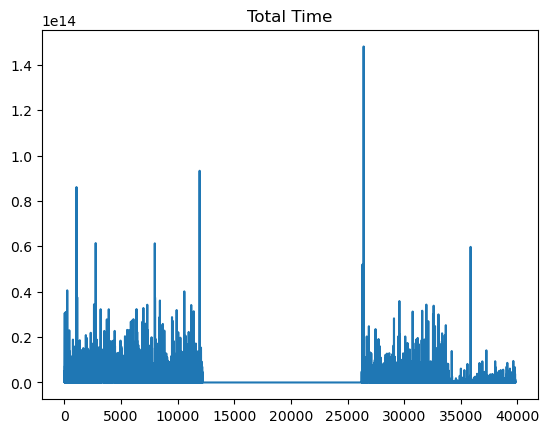

In [21]:
# Replace NaN values in End_time

# To create total time, End_time first needs to have all it's NaN values changed to a valid entry. Any NaN values in End_Time can be set to the value in Start_Time as we know all these are values other than NaN. This will create a total_time of 0 minutes.

df['End_Time'].fillna(df['Start_Time'], inplace=True)

# Create total_time column which is End_time - Start_Time.
total_time = (df['End_Time'] - df['Start_Time'])

# Insert total_time into dataframe after End_time.
df.insert(loc=4,
          column='Total_Time',
          value=total_time)

# Plot the current total_time column to get an idea of the missing data.
df['Total_Time'].plot(title='Total Time')

In [22]:
df['Total_Time'].mean()

Timedelta('0 days 00:20:06.339496093')

The above plot shows a large amount of missing/zero values in the middle of the dataset. The mean of the column also shows us that the average clearing time takes 20 minutes. The missing data will be replaced with the average Total_Time in incidents containing the same description.

In [23]:
# Convert total time to integer representing minutes to allow for easier boolean comparisons to find 0 values.
df['Total_Time'] = df['Total_Time'] / pd.Timedelta(minutes=1)

# Produce a new dataframe with the mean of total time with incidents of the same value.
mean_values_df = df[['Description', 'Total_Time']]

# Remove any values that contain zero to get a more accurate average. This can result in cases where a unique crash that is misreported is now missing from the average dataframe. This will be handled when we iterate through the original df.
mean_values_df = mean_values_df[mean_values_df['Total_Time'] != 0.0]

# Group this dataframe by the mean of each descriptor.
mean_values_df = mean_values_df.groupby('Description').mean(numeric_only=False)

# Loop through df and change any values currently at 0 to the average of the descriptor. If an error occurs catch it and increment the count variable. This will then be printed to let the user know how many rows don't have an average to replace with and thus will remain at 0.
count = 0
for index, row in df.iterrows():
    if row[4] == 0.0:
        try:
            df.at[index, 'Total_Time'] = mean_values_df.loc[row[1]]
        except:
            count = count + 1

print(f'Number of rows that will remain at 0: {count}')

# Convert the total_time column back to time delta.
df['Total_Time'] = pd.to_timedelta(df['Total_Time'], unit='min')

Number of rows that will remain at 0: 2093


<AxesSubplot:title={'center':'Total Time'}>

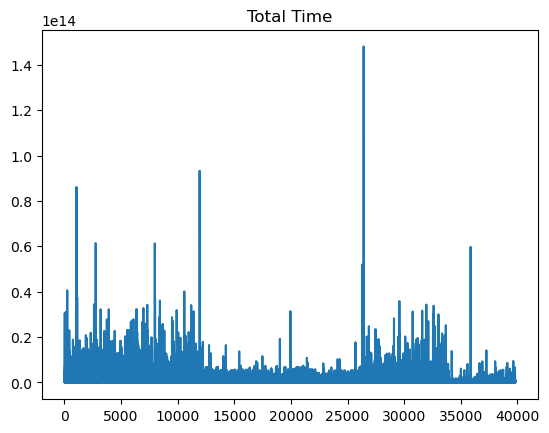

In [24]:
# Plot the total time column to confirm middle data has been fixed.
df['Total_Time'].plot(title='Total Time')

In [25]:
df['Total_Time'].mean()

Timedelta('0 days 00:30:01.155544269')

The new plot shows that the formerly null/zeroed-out data has valid entries. The new total time mean is thirty minutes. Upon looking for average traffic incident clean-up times, there were no solid sources to pull from. Some articles such as [this](https://mynorthwest.com/1216262/washington-incident-response-2018/) one and [this](https://www.sciencedirect.com/science/article/pii/S2046043018300522) indicate traffic incidents can take anywhere from thirteen minutes to three hours to clear. For this analysis, the data seems to point toward 30 minutes average cleanup time in Calgary accidents. Of course, this data is only as good as the reporting method, and a lot of the data was missing at the start. Any insights gained from this portion of the data should be taken with a grain of salt as we don't know the accuracy of the reporting timeline, and don't know if the method of replacing a large portion of the data with the current average is necessarily accurate.

Finally, we need to adjust any End_time columns that are equivalent to Start_Time with a new value generated from Start_Time + Total_Time

In [26]:
# Iterate through df to replace End_time with a more accurate time in relation to Start_Time and total_time if End_time = Start_Time
for index, row in df.iterrows():
    if row[3] == row[2]:
        df.at[index, 'End_Time'] = row[2] + row[4]

# Confirm all NA values have been removed/updated.
df.isnull().sum()

Incident_Info    0
Description      0
Start_Time       0
End_Time         0
Total_Time       0
Quadrant         0
Longitude        0
Latitude         0
dtype: int64

#### 4.25 Add Year, Month, Day, Hour Columns

To answer the research questions it would be wise to split the Start_Time column into its respective year, month, day and hour. Doing so will allow for simple statistical analysis regarding the relationship between time and incident counts. We will not worry about including the end time column here as the start time is detailed enough to answer the research questions.

In [27]:
# Create year, month and day columns from Start_Time
# Below line taken from https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas
df[['Year', 'Month', 'Day']] = df['Start_Time'].apply(lambda x: x.timetuple()[:3]).tolist()

# Adjust the day column to represent the days of the week, opposed to the days of the month. Add one to remove 0 indexing.
df['Day'] = df['Start_Time'].dt.dayofweek + 1

# Get hour of crash and add one to remove 0 indexing.
df['Hour'] = df['Start_Time'].dt.hour + 1

# Ensure new columns have been created successfully.
df.sample(1)

,Incident_Info,Description,Start_Time,End_Time,Total_Time,Quadrant,Longitude,Latitude,Year,Month,Day,Hour
38378,Northbound Deerfoot Trail at Anderson Road SE,Two vehicle incident. Affecting NB and SB traf...,2017-05-12 11:36:00,2017-05-12 11:43:00,0 days 00:07:00,SE,-114.033912,50.948342,2017,5,5,12


### 4.3 Data Cleaning Summary

The data frame is now adjusted to allow for quality analysis. Irrelevant columns are removed, new useful columns have been created, proper datatypes have been assigned, and NA values have been altered through replacement using the mean value of similar data. We can now move on to properly exploring the data.

## 5. Exploratory Data Analysis

### 5.1 Analysis

Now that the data frame is refactored, the data can be explored to provide insights that will answer our research questions.

#### 5.11 Basic Statistics

Let's see if any insights can first be gained by looking at general statistics for the dataset.

In [28]:
df.describe()

,Total_Time,Longitude,Latitude,Year,Month,Day,Hour
count,39809,39809.000000,39809.000000,39809.00000,39809.000000,39809.000000,39809.000000
mean,0 days 00:30:01.155544269,-114.049202,51.041698,2019.88377,6.685398,3.751714,14.465146
std,0 days 00:42:11.742260704,0.070357,0.067216,1.90374,3.647239,1.858353,5.240666
min,0 days 00:00:00,-114.309770,50.848744,2016.00000,1.000000,1.000000,1.000000
25%,0 days 00:03:00,-114.094706,50.996389,2018.00000,3.000000,2.000000,10.000000
50%,0 days 00:21:03.342981960,-114.047843,51.047628,2020.00000,7.000000,4.000000,15.000000
75%,0 days 00:38:58.311842700,-114.000264,51.086636,2022.00000,10.000000,5.000000,18.000000
max,1 days 17:08:00,-113.871362,51.195648,2023.00000,12.000000,7.000000,24.000000


Nothing sticks out too much here. Most columns have an even distribution. The year column tells us that there are more values in 2019 and earlier, which would make sense as 2020 most likely had a historic drop in traffic incidents. There also seems to be an accident that took over a day to clean up. Most likely a reporting error, but outlier data like this needs to be explored to see how it skews the analysis.

#### 5.12 Traffic Incident Heat Map

In [29]:
# Create folium map object to plot heat map.
calgary_coordinates = [51.049999, -114.066666]
map_width = 1000
map_height = 500

folium_figure = folium.Figure(width=map_width, height=map_height)
folium_map = folium.Map(location=calgary_coordinates, width=map_width, height=map_height).add_to(folium_figure)

# Create list that stores all the coordinates of the traffic incidents in the dataset.
incident_coordinates_list = df[['Latitude', 'Longitude']].values.tolist()

# Add the heat map layer to the map, using the list of coordinates.
HeatMap(incident_coordinates_list, radius=15).add_to(folium_map)

# Draw folium map.
folium_map

Observing the map at the start is a lot to take in. However, zooming in on the city allows the heat map to produce clear patterns. Some of these are listed below.

- Main roadways such as Stoney Trail, Deerfoot Trail and Macleod Trail seem to have accidents throughout.
- Major intersections have a high number of reported incidents and seem to be where the majority of concentration is.
- Downtown roads also have a high number of incidents
- Stoney Trail and Deerfoot are highways with a speed limit of 100km/hr. Deerfoot has a higher intensity on the heat map. While Stony appears to have higher incidents only at off-ramps and merges. The map indicates that Stoney is the safer option when planning a longer road trip. Unfortunately, our data set does not have much information about the severity of the crashes. However, comparing the incidents between Stoney and Deerfoot could be a good future project.

Overall it seems that the original hypothesis was true. This heat map indicates commuters are at a higher risk of accidents on major roadways and in high density downtown areas. Intersections also have a high concentration of incidents. These are all ideas that are relatively known to an avid commuter. Are there further insights to be gained by changing the timeframe that we look at the data?

#### 5.121 Quadrant Analysis

In [30]:
# Produce total counts in each quadrant of the city.
df['Quadrant'].value_counts()

SE    12951
NE    10576
SW     8182
NW     8100
Name: Quadrant, dtype: int64

<AxesSubplot:title={'center':'Quadrant Pie Plot'}, ylabel='Quadrant'>

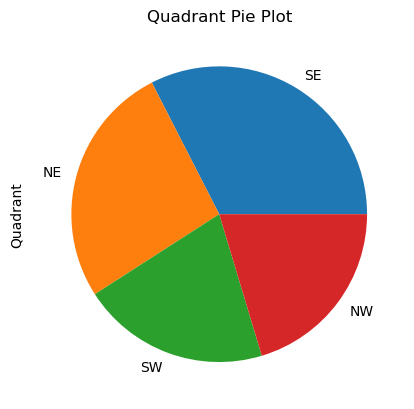

In [60]:
# Visualize the quadrant statistics.
df['Quadrant'].value_counts().plot(kind='pie', title='Quadrant Pie Plot')

The above indicates the SE is the most dangerous portion of the city compared to the other three quadrants, while the NW is the quadrant with the least amount of incidents. A map is below that indicates where the quadrants are in the city.

<img src="./calgary-quadrants-map.png" height="100px">

#### 5.13 Change in Traffic Incidents over Time

A general understanding of the location of traffic incidents has been obtained through the heat map. Now time can be analyzed to see how incidents change throughout the year, month and daily timelines. Due to the similarities in the columns containing information on time, a function will be created to allow for easy querying and visualization with these columns.

In [31]:
def query_time(dataframe, time):
    """
    Query time returns the value counts of all time values in a given row representing a unit of time. i.e. hour, year etc.

    :param dataframe: Dataframe to analyse
    :param time: The name of the column with a time value in int64 format.
    :return: The counts of all unique time values in the given dataframe column.
    """

    # Get time counts from dataframe column, ensuring it is sorted by the index.
    counts = dataframe[time].value_counts().sort_index()

    # Draw a bar chart to the notebook representing the time counts.
    counts.plot(kind='bar',
                use_index=True,
                ylabel="Number of Traffic Incidents",
                xlabel=time,
                title=f"Traffic Incidents by {time}")

    # Return time counts for further processing.
    return counts

##### 5.131 Yearly Change

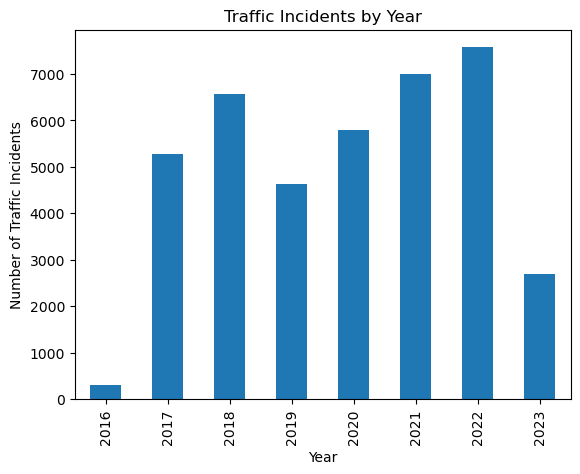

In [32]:
# Query year column to get visual on the total incidents per year.
yearly_counts = query_time(df, 'Year')

In [33]:
yearly_counts[[2017, 2018, 2020, 2021, 2022]].mean()

6437.0

The graph visualizes the total incident count per year. With this graph, several insights about the data itself and traffic incidents can be gained. Those of these are listed below.

- 2016, 2019, and 2023 do not represent fully tracked years. Therefore, these columns should be omitted from a median calculation.
- 2022 had the most incidents, while 2017 had the least when accounting for an accurate year.
	-2022 having the most incidents makes sense as Calgary's population is growing faster than in previous years.
- The pandemic in 2020 influenced the total number of reported incidents. However, the effect is smaller than I would have predicted. It's only ~500 incidents below the mean. An interesting comparison would be to see how the traffic counts fluctuated during this time to see the overall effect the pandemic had on traffic.
- The average number of traffic incidents reported through the ATIS per year is 6437.

Comparing this information to other sources paints an interesting picture. This dataset and other sources of information such as [this](https://calgary.ctvnews.ca/crashes-on-calgary-roads-dropped-37-in-2020-mainly-due-to-the-pandemic-1.5296251) CTV news article disagree. The article states, "According to numbers gathered by Calgary police, 22,564 collisions were reported between January and November 2020, compared to 35,792 in 2019 — a decrease of 13,228. There were 39,344 crashes reported during that period in 2018." This is in contradiction to our dataset which has ~39,000 total entries. The contradiction between the two sources indicates that the ATIS system is not reporting even half of the incidents that occur per year. Is this due to the ATIS system's failure to catch the majority of incidents, or is this due to the majority of incidents being of little consequence and therefore, not worth reporting? Unfortunately, without better data, it needs to be taken into account that our results may not necessarily be accurate or meaningful in painting a picture of the incidents in Calgary.

##### 5.132 Monthly Change

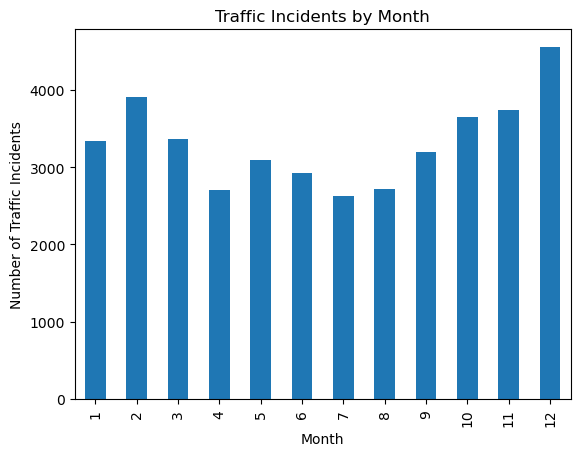

In [34]:
# Query Month column to get visual on the total incidents per month.
monthly_counts = query_time(df, 'Month')

In [35]:
monthly_counts.mean()

3317.4166666666665

The monthly graph shows a correlation between the seasons and traffic incident count. We can see that the winter months have a higher-than-average incident count; While the summer months have a lower-than-average incident count. The graph confirms the hypothesis that winter months are more dangerous than summer months. December is the month with the most reported incidents, and July is the month with the least reported incidents.

##### 5.123 Daily Change

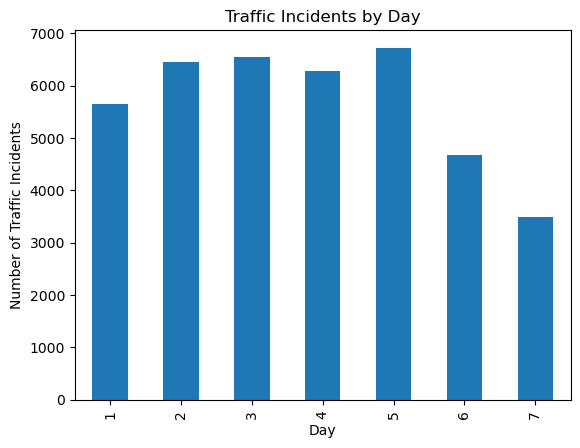

In [36]:
# Query year column to get visual on the total incidents per year.
daily_counts = query_time(df, 'Day')

Unsurprisingly, the weekdays have the most incidents per day. Friday had the highest incident count, and Sunday had the lowest count. Surprisingly, Monday has the third-lowest number of incidents. As a commuter in Calgary, I always assumed there would be less chance of an incident affecting my commute on Friday as opposed to Monday.
Saturday and Sunday were the days with the lowest traffic incidents, as fewer drivers are on the road during the weekend.

This data confirmed the hypothesis that weekdays were the most dangerous days to be on the road.

Cross-referencing this information with traffic volume counts by day could lead to deeper insights into daily traffic habits in Calgary for future analysis.

##### 5.134 Hourly Change

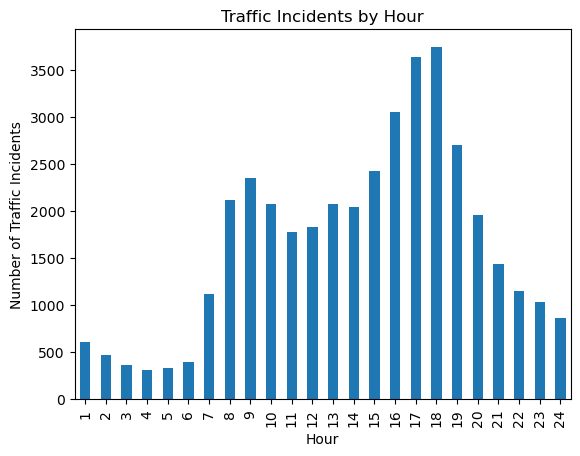

In [37]:
# Query Hour column to get visual on the total incidents per hour.
daily_counts = query_time(df, 'Hour')

Graphing the hourly traffic incident count paints a much more stark picture. Rush hours between 8-10 and 16-18 are the highest at their local points. Confirming that rush hours are more dangerous confirms one of the original hypotheses. Generally, the time during business operations has a rise in traffic incidents and times at which the general population is sleeping see a low amount of traffic incidents.

Using this hourly data an interesting further study would be to compare the severity and cause of the accident by the hour of the day. Unfortunately, our incident description column is not robust enough to complete this analysis. However, should future data be released it would allow the City to have different first responders ready at varying hours throughout the day. For example, a hypothesis could state that incidents early in the morning could be due to drivers under the influence and may be generally deadlier. The City could then adjust their response plan for incidents during this timeframe.

### 5.2 NLP Processing on Incident Descriptions

As discussed before, the description and incident info columns are lacklustre in the information provided. The former contains the location of the incident in terms of streets, and the latter a brief description of the kind of incident and affected lanes. While this is not ideal, there may be insights to be gained by simple language processing on these columns.

With there being two columns that contain strings, we will create a function that processes both columns.

#### 5.21 Incident_Info Analysis

In [38]:
# Import the stopwords list from nltk to focus on more meaningful words in this dataset.
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


def series_to_wordcloud(series):
    """
    series_to_wordcloud takes an input series of strings, processes it, produces a wordcloud and returns a tokenized list for further analysis.

    :param series: The input series to be tokenized and turned into a wordcloud. Must be od datatype string.
    :return: Returns the tokenized list created from the input series.
    """

    # Create a temp list from the input series and tokenize it.
    temp_list = series.tolist()
    temp_list = ' '.join(temp_list). \
        lower()
    temp_list = nltk.word_tokenize(temp_list)

    # Remove punctuation
    temp_list = [word for word in temp_list if word.isalpha()]

    # Remove stopwords
    temp_list = [word for word in temp_list if word not in stop_words]

    # Generate wordcloud
    wordcloud = WordCloud().generate(' '.join(temp_list))
    plt.imshow(wordcloud, interpolation='bilinear')

    # Show image only and draw to notebook
    plt.axis('off')
    plt.show()

    # Return tokenized list to allow for further processing if needed
    return temp_list

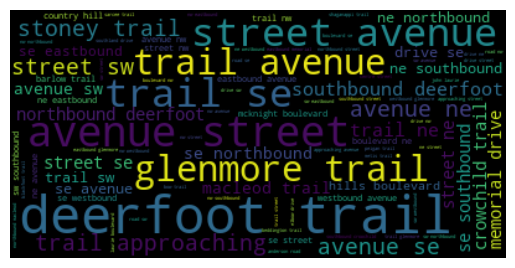

In [39]:
# Create wordcloud for incident info and store tokenized list for future processing.
incident_info_tokenized = pd.Series(series_to_wordcloud(df['Incident_Info']))

The word cloud of the Incident_Info column further confirms what our prior analysis hinted at. Deerfoot and Glenmore Trail are notoriously busy, heavily congested roads with many merges and off-ramps. Seeing their names as large words in this word cloud confirms that they are subject to more incidents. Past this, the word cloud struggles to highlight further information as trails and avenues are so frequent. Learning the respective value counts further along may help paint a better picture.

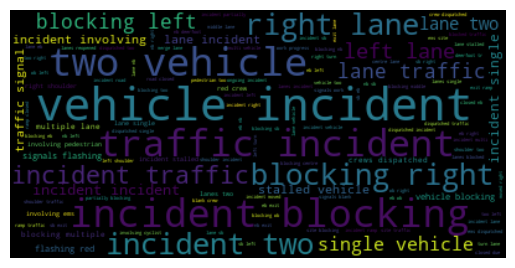

In [40]:
description_tokenized = pd.Series(series_to_wordcloud(df['Description']))

The description word cloud also reaffirms our current understanding of Calgary traffic incidents. Some observations are below:

-At least one vehicle is usually involved.
-Either the left or right lanes are usually involved, indicating the collision is near a merge or off-ramp.
-On a happier note, we can see that Incidents involving pedestrians are on a smaller scale than everything.

Due to the simple language used in the text data, it's hard to gain further meaningful insights as all the sentences are so similar. Looking at the statistics may paint a better light. However, these word clouds are a poor start to gaining insights from text-based data.

#### 5.22 Further NLP Processing

Let's see if looking at the statistics of the tokenized columns provides further insights.

#### 5.221 Incident Info Statistics

In [41]:
incident_info_tokenized.value_counts()[:10]

trail        25506
avenue       17841
street       15527
se           13319
ne           10911
sw            8171
drive         7934
deerfoot      7304
nw            6649
boulevard     6399
dtype: int64

<AxesSubplot:title={'center':'Incident Info Most Used Words'}, ylabel='Words'>

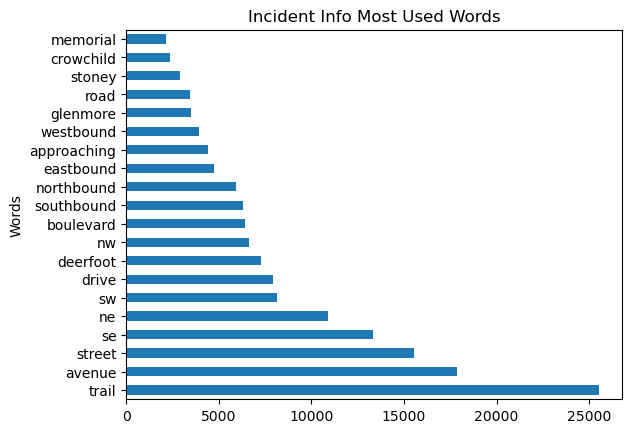

In [42]:
# Plot the most common words in incident_info to visualize the data.
incident_info_tokenized.value_counts()[:20].plot(kind='barh',
                                                 title='Incident Info Most Used Words',
                                                 xlabel='Words',
                                                 ylabel='Frequency')

When looking at the most frequent words in Incident_Info the type of road is seen as the top three values. [This](https://calgaryherald.com/news/local-news/in-naming-streets-strict-rules-dictate-roads-rises-trails-and-more) website indicates the following definitions are used to name a road.

- Avenue: Generally numerical east-west roadways.
- Drive: A collector roadway.
- Street: Generally numerical north-south roadways.
- Trail: High-traffic transportation arteries that span more than one area of the city.

Our data pinpoints that a roadway with trail is the most frequently involved word in the information surrounding these crashes. Highlighting the fact that high-speed roadways with multiple on and off-ramps are the most dangerous roads in the city. Avenue and street are also in the top 3. These names are mostly reserved for downtown roadways and also confirm that downtown driving is another problem for Calgary drivers.

Further analysis could be done to compare the severity of crashes on trails vs avenues and streets.

In [43]:
# Query the least common words in incident info
incident_info_tokenized.value_counts()[-10:]

dalford      1
trial        1
bowglen      1
shawbille    1
andd         1
bedington    1
senlac       1
deeerfoot    1
plaza        1
drve         1
dtype: int64

The least common words appear to be a collection of grammatical errors. This would indicate the RSS feed this data is based on has some human input and is not purely automated. It also reaffirms that the text data for this dataset is a secondary thought and not all that important to the overall dataset, as many grammatical errors seem to be present.

#### 5.221 Description Statistics

In [44]:
description_tokenized.value_counts()[:10]

incident    36164
vehicle     19845
blocking    14886
two         14132
traffic     13968
lane        11255
right        8579
left         4994
single       3776
lanes        3352
dtype: int64

<AxesSubplot:title={'center':'Description Most Used Words'}, ylabel='Words'>

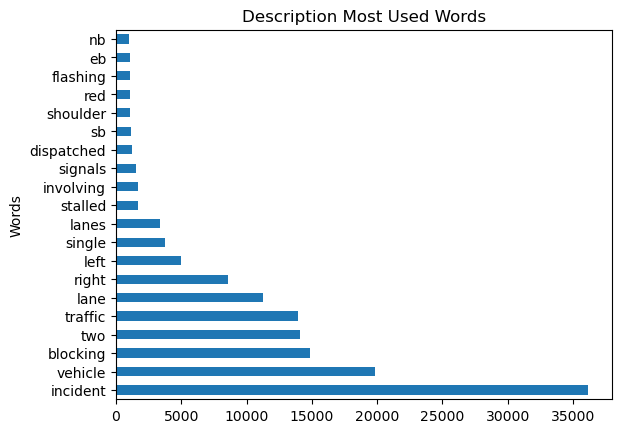

In [45]:
# Plot the most common words in incident_info to visualize the data.
description_tokenized.value_counts()[:20].plot(kind='barh',
                                               title='Description Most Used Words',
                                               xlabel='Words',
                                               ylabel='Frequency')

In [46]:
description_tokenized.value_counts()[-10:]

canadian    1
tright      1
georgia     1
also        1
outer       1
grassy      1
trafic      1
protest     1
causing     1
ashworth    1
dtype: int64

The statistics for description don't give us many insights. The RSS feed only indicates the bare minimum information for drivers to plan their routes. This column is not meant to be analyzed in this aspect as the information is of more use to the commuters at the point in time it was reported. It also does not contain information such as severity as all the details about the crash are not known at the time of reporting. To get a better picture of the traffic incidents in Calgary, revising the RSS feed to store more information after the traffic incident is cleared would be a first step in allowing for further meaningful insights.

Overall, processing the text data of the incidents confirmed that the data set needs to be updated to include more information regarding the crash.

### 5.3 Total_Time Analysis

For the final step in this exploration, a brief look at the statistics of the Total_Time column will be highlighted. This may provide some additional insights. However, this column contained a lot of missing data that was replaced. It also may not represent the accurate clean-up time as we don't know how effective the reporting methods are.

In [47]:
# Convert the total time column to floats to allow for easier processing.
total_time_int = df['Total_Time'] / pd.Timedelta(minutes=1)

# Sort in ascending order.
total_time_int = total_time_int.sort_values(ascending=True)

# Get genera statistics.
total_time_int.describe()

count    39809.000000
mean        30.019259
std         42.195704
min          0.000000
25%          3.000000
50%         21.055716
75%         38.971864
max       2468.000000
Name: Total_Time, dtype: float64

The general statistics indicate that the median reporting time between incident start and incident end is 30 minutes and the deviation from this value is 42 minutes plus or minus. Comparing the average response time to [this](https://ops.fhwa.dot.gov/publications/fhwahop15028/step4.htm#sec2) study indicates our values are most likely incorrect. A large amount of missing data and seemingly random total time values are indications that this column won't provide much in terms of insights.

In [48]:
# View the highest values in total time.
total_time_int[-10:]

1131      625.750000
10587     669.000000
251       676.683333
26307     866.000000
35862     996.000000
7980     1022.000000
2762     1023.783333
1067     1435.150000
11939    1555.000000
26419    2468.000000
Name: Total_Time, dtype: float64

In [49]:
df.loc[26419]

Incident_Info                       MacLeod Trail and 36 Avenue SW
Description      Northbound is reduced to one left lane, southb...
Start_Time                                     2019-03-01 14:09:00
End_Time                                       2019-03-03 07:17:00
Total_Time                                         1 days 17:08:00
Quadrant                                                        SW
Longitude                                              -114.060915
Latitude                                                 51.021328
Year                                                          2019
Month                                                            3
Day                                                              5
Hour                                                            15
Name: 26419, dtype: object

The longest total time value appears to be a road closure for construction.  Unfortunately, the dataset does not use explicit language about the "incident" therefore, we can't confirm if this is indeed construction or an incident. To verify if the dataset is skewed by a large amount of incorrect data such as this row. A count of values over 300 will give us an idea of how many potential construction reports made it into this traffic incident data.

In [50]:
incidents_over_5_hours = total_time_int > 300
incidents_over_5_hours.sum()

116

The total count for incidents that took over 5 hours is only 116 and out of a dataset that has ~40,000 entries it's not enough to worry about altering.

Overall, this column produced a rough idea on the average reporting time of Calgary incidents. However, upon comparison with other studies. It appears this data can't be relied upon to make informed decisions.

### 5.4 Exploratory Data Analysis Summary

Through high-level statistics gathering with pandas and broad visualizations using folium and matplotlib an understanding of this dataset has been gained. Many of the research questions have been answered, with some coming up short in the natural language processing and incident timeline sections. The data has shortcomings in its reliability and reporting standards when compared to other more rigorous studies on traffic incidents.

However, a broad understanding of the traffic incidents in Calgary has been gained.

## 6. Reflection and Critical Evaluation

### 6.1 Reflection

Throughout this project, the data from Calgary's open data website about traffic incidents have been analyzed. SODA API was used to download and store the data in a pandas data frame. The data frame allowed for simple manipulation and analysis using multiple different tools. Simple visualizations such as plots, heatmaps and word clouds were combined with simple statistics to paint a very broad picture of the traffic incidents in Calgary. Insights have been gained that have confirmed preconceived assumptions about traffic incidents in Calgary. All of this analysis was in the vein of answering simple research questions. The data answered most of our research questions but fell short in some areas.

1. Which areas of the city have the most incidents?
    - Hypothesis: Downtown roads and highways are the most dangerous roads.
        -  This hypothesis was confirmed by the dataset. We saw that high-speed roadways with multiple merges and off-ramps pose a significantly higher risk to commuters in the City of Calgary. Streets and avenues that are mostly downtown also made up a significant portion of the reported incidents in the dataset. Thereby, confirming that commuters using these roads are at a higher risk of being affected by a traffic incident in some manner.
2. What time of day has the highest number of incidents?
    - Hypothesis: Rush hours (8-9) and (5-6) are the most dangerous hours of the day.
        -  This hypothesis was also confirmed by the analysis. Plotting the hours the traffic incidents took place highlighted how rush hours were their highest local maximum of incident counts. The rush hour between 6-8 serves as the most dangerous time of the day. While this point may seem obvious when confirmed, the data helps reinforce this idea and gives commuters a reason to be a little safer during rush hour, especially on high-speed roads.
3. Does the day, week, month, or year cause variance in the frequency of incidents?
    - Hypothesis: Winter months and weekdays are the most dangerous times to be on the road.
        - This hypothesis was also confirmed by our analysis. We saw that winter months had a higher number of incidents than the mean and that weekdays had almost double the amount of incidents compared to weekends. While a driver should always be fully aware during a commute. This data highlights that vehicles should have winter tires and competent defensive drivers, especially when the conditions are not ideal. A surprising insight from this part of the analysis is that Friday is the most dangerous day to commute in the City. My assumption was Monday. However, Monday was the third-lowest day for total incidents. Visualizing how traffic behaviour changes on a time basis deserves more attention in future analysis projects.
4. What kind of incidents are happening?
    - Does the type of incident affect the time between the start and end of an accident?
        - Unfortunately, our dataset lacked sufficient information to properly distinguish the type of incidents. The description for almost all incidents was a simple sentence, which contained information that would be helpful to drivers planning their daily commute, but not information that describes the severity of the crash, type of incident etc. This is a point I believe the ATIS could be upgraded to include. Having this type of information would allow for easy analysis of roads in the city that are more dangerous than others in a higher degree of understanding.
    - Does the type of incident change based on location in the city?
        -  Our dataset also failed to answer this question. The incident info did not contain sufficient information to answer this question. As very few incidents had quality information past Traffic Incidents, left lane blocked etc. Hopefully, in the future, the incident info can be more flushed out to highlight information such as pedestrians involved, bikers involved, motorcycle incident etc. To gain a deeper understanding of exactly what dangers each road can pose to not only commuters but also non-commuters.

Overall the exploration of this project highlighted basic information about traffic incidents in Calgary. It also managed to enlighten us on the perils of failing to future-proof your data collection methods.

### 6.2 Critical Evaluation

Successful data analysis is based on two items, the quality of the data and the individual analyzing the data. Throughout this project, I have come to realize that the chosen dataset is great for its intended task, but not more. It's meant to provide commuters with reasonably accurate information on the current road conditions in Calgary. Upon reflection, it's clear this limited the avenues I could proceed with this analysis. As discussed above, gaining a deeper understanding of what incidents occur when and where is difficult when we only know that an incident occurred at x coordinate. For cities to accurately understand their driving patterns and areas to focus on, I believe more complex ATIS tracking systems need to be implemented to help traffic analysts point city planners in the right direction.

The dataset was not the only area that led to limitations and challenges. My skills as a data analyst also provided a challenge. Python and its many data-oriented libraries serve as a phenomenal tool to help understand any given dataset. However, it's clear, after many hours of research and documentation review one can't become proficient at data analysis after one dataset or even twenty. It's an ever-growing field and the knowledge base is massive. It's difficult to know which path you should take to ensure you get accurate results from the data. I am proud of this project. However, there are clear areas for improvement, which are listed below.

- Creating an interactive map with the data is something I originally planned to do. After researching the implementation, it was clear it was not feasible with the current timeline. The map was intended to show the incidents by year and have interactive markers. I also wanted to implement a choropleth map to help get an idea of the incidents by city districts. That too proved beyond my current skill set. This data is meant to be displayed on a map of some kind, and I believe that further exploration with mapping this data can lead to valuable insights that I fell short of.
- Replacing NA values is another area I feel deserves to be reviewed. It's hard to verify that you made the correct decision in either replacing NA values or removing them from the dataset entirely. Given more time, it would be worthwhile to see if removing all invalid values instead of replacing them with the median is a better idea.
- Pandas is an extremely powerful tool, and using it as a beginner is a big undertaking. As an individual who mostly used applications like Excel, it's hard to adjust to a programming workflow and manipulate data without a visual aid. Through many attempts, the panda's data frame turned into fairly wrangled data. However, I believe that a deeper understanding of pandas would lead to better insights and a more polished research project.

## 7. Conclusion

Throughout this EDA, common beliefs around the City of Calgary's traffic incident behaviours have been confirmed through data analysis. The reader now has a general understanding of what roads and during what times traffic incidents are most likely to occur in the City of Calgary.

The dataset has also been refined to allow for further analysis such as predictive modelling. Should this topic be further pursued I believe this dataset combined with other data from open Calgary and open Alberta/Canada can provide gainful insight that will allow city planners to evaluate the success of the road system in Calgary. For example, by combining traffic counts with incident counts, Calgary could confirm if new intersection types such as the newly implemented [diamond](https://www.cbc.ca/news/canada/calgary/diverging-diamond-interchange-opens-calgary-1.4245773) in the south of the city reduced total incidents while maintaining the same amount of traffic.

The data can also be used to start a predictive modelling analysis to start aiding in the city's incident response procedures. Using inputs such as this refined dataset alongside weather and traffic count data an AI model could aid in alerting the city to potential high congestion days. This would allow them to prepare ahead of time and thereby reduce potential fatalities and clean-up times.

Overall traffic data of all kinds should be further explored and refined to ensure that governments and commuters reap the benefits from safe roads, properly planned intersections and proper civil engineering through data analysis.

## 8. References and Resources

### 8.1 References

### Literature Review

- Henrick J. Haule (2018, July 6). Evaluating the impact and clearance duration of freeway incidents. International Journal of Transportation Science and Technology. https://www.sciencedirect.com/science/article/pii/S2046043018300522
- (2022, June 20). Road traffic injuries. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries
- (2020). Key messages quick statistics - ESCRIBE meetings. 2020 Traffic Collision Summary. City of Calgary. https://pub-calgary.escribemeetings.com/filestream.ashx?DocumentId=189649
- Fard, M.Sc., P.Eng., PMP, S. (2020, August 17). Prediction of traffic incidents in Calgary - linkedin. https://www.linkedin.com/pulse/prediction-traffic-incidents-calgary-siavash-fard-

### Articles

- Three Canadian cities rank among World’s most liveable. Moving2Canada. (2022, November 10). https://moving2canada.com/news-and-features/features/planning/destination-guides/calgary/2022-eiu-liveability-index-three-canadian-cities-top-ten/

### 8.2 Resources used

### Documentation

- Getting started with the soda consumer api. Socrata. https://dev.socrata.com/consumers/getting-started.html
- pandas 2.0.2 documentation. https://pandas.pydata.org/docs/

#### Data Analysis Resources

- Rob Mulla. (2021). Exploratory Data Analysis with Pandas Python 2023. YouTube. Retrieved May 30, 2023, from https://www.youtube.com/watch?v=xi0vhXFPegw&amp;t=372s.
- Bhutaiya, R. (2022, February 25). Pandas - EDA: Smart way to replace nan. Medium. https://medium.com/analytics-vidhya/pandas-eda-smart-way-to-replace-nan-554aedc0b5b6

#### Data Sourcing

- Traffic incidents: Open Calgary. data.calgary.ca. https://data.calgary.ca/Transportation-Transit/Traffic-Incidents/35ra-9556
- Calgary Traffic Report and road closures. https://www.calgary.ca. https://www.calgary.ca/roads/conditions/traffic.html

#### Pandas Resources

- pandas.Series.value_counts - pandas 2.0.2 documentation. https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
- Random sampling from a list in Python (random.choice, Sample, choices). https://note.nkmk.me/en/python-random-choice-sample-choices/
- How to replace all values in a pandas dataframe not in a list?. Stack Overflow. https://stackoverflow.com/questions/34866856/how-to-replace-all-values-in-a-pandas-dataframe-not-in-a-list
- (2023, May 9). Replace nan values with zeros in pandas DataFrame. GeeksforGeeks. https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
- Pandas: Subtracting two date columns and the result being an integer. Stack Overflow. https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer
- How to split a date column into separate day , month ,year column in Pandas. Stack Overflow. https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas

### Python Aid

- Import data to dataframe using SODA API. Stack Overflow. https://stackoverflow.com/questions/46572365/import-data-to-dataframe-using-soda-api